In [ ]:
import pandas as pd
from imblearn.over_sampling import SMOTE
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rcParams['figure.figsize'] = (20, 8)

In [ ]:
Water = pd.read_csv("Water_ML.csv")
# Weather= pd.read_csv("Weather_ML.csv")

In [ ]:
Water = Water.dropna(axis = 0)
Water.pop('Unnamed: 0')
Water.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39670 entries, 0 to 39669
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Water Temperature  39670 non-null  float64
 1   Turbidity          39670 non-null  float64
 2   Wave Height        39670 non-null  float64
 3   Wave Period        39670 non-null  float64
 4   Battery Life       39670 non-null  float64
 5   Measurement Day    39670 non-null  int64  
 6   Measurement Month  39670 non-null  int64  
 7   Measurement Year   39670 non-null  int64  
 8   Measurement Hour   39670 non-null  int64  
 9   Measurement Date   39670 non-null  object 
 10  Latitude           39670 non-null  float64
 11  Longitude          39670 non-null  float64
dtypes: float64(7), int64(4), object(1)
memory usage: 3.9+ MB


In [ ]:
Water['Measurement Date'] = pd.to_datetime(Water['Measurement Date'])
# Weather['Measurement Date'] = pd.to_datetime(Weather['Measurement Date'])

grouped_Water = Water.groupby(by=['Measurement Date']).mean()

grouped_Water_summer = grouped_Water['Measurement Date']
# grouped_Weather = Weather.groupby(['Measurement Date']).mean()
grouped_Water

In [ ]:

grouped_Water["class"] = grouped_Water.apply(classifier,axis=1)
# raw_data["class"] = raw_data.apply(classifier, axis=1)

In [ ]:
print(grouped_Water["class"].value_counts())
grouped_Water.describe()


In [ ]:
grouped_Water.to_csv("WB_0.csv")

In [ ]:
Water_0 = pd.read_csv("WB_0.csv")

In [ ]:
Weather_0 = raw_data.to_csv("wWB_0.csv")

In [ ]:
grouped_Weather.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2199 entries, 2015-01-06 to 2022-12-05
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Air Temperature       2199 non-null   float64
 1   Wet Bulb Temperature  2199 non-null   float64
 2   Humidity              2199 non-null   float64
 3   Total Rain            2199 non-null   float64
 4   Wind Direction        2199 non-null   float64
 5   Wind Speed            2199 non-null   float64
 6   Maximum Wind Speed    2199 non-null   float64
 7   Barometric Pressure   2199 non-null   float64
 8   Solar Radiation       2199 non-null   float64
 9   Heading               2199 non-null   float64
 10  Battery Life          2199 non-null   float64
 11  Latitude              2199 non-null   float64
 12  Longitude             2199 non-null   float64
 13  Measurement Day       2199 non-null   float64
 14  Measurement Month     2199 non-null   float64
 15  Mea

In [ ]:
raw_data = pd.merge(grouped_Water, grouped_Weather, on='Measurement Date', how = 'inner')
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 622 entries, 2015-01-06 to 2021-12-07
Data columns (total 29 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Water Temperature     622 non-null    float64
 1   Turbidity             622 non-null    float64
 2   Wave Height           622 non-null    float64
 3   Wave Period           622 non-null    float64
 4   Battery Life_x        622 non-null    float64
 5   Measurement Day_x     622 non-null    float64
 6   Measurement Month_x   622 non-null    float64
 7   Measurement Year_x    622 non-null    float64
 8   Measurement Hour_x    622 non-null    float64
 9   Latitude_x            622 non-null    float64
 10  Longitude_x           622 non-null    float64
 11  class                 622 non-null    int64  
 12  Air Temperature       622 non-null    float64
 13  Wet Bulb Temperature  622 non-null    float64
 14  Humidity              622 non-null    float64
 15  Tota

In [ ]:
raw_data.pop("Latitude_y")
raw_data.pop("Longitude_y")
raw_data.pop("Battery Life_y")
raw_data.pop("Measurement Day_y")
raw_data.pop("Measurement Month_y")
raw_data.pop("Measurement Hour_y")
raw_data.pop("Measurement Year_y")

raw_data.rename(columns = {'Battery Life_x':'Battery Life', 'Measurement Day_x':'Measurement Day', 
                           'Measurement Month_x':'Measurement Month', 'Measurement Year_x':'Measurement Year',
                           'Measurement Hour_x':'Measurement Hour', 'Latitude_x':'Latitude',
                           'Longitude_x':'Longitude'}, inplace = True)

raw_data.info()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 622 entries, 2015-01-06 to 2021-12-07
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Water Temperature     622 non-null    float64
 1   Turbidity             622 non-null    float64
 2   Wave Height           622 non-null    float64
 3   Wave Period           622 non-null    float64
 4   Battery Life          622 non-null    float64
 5   Measurement Day       622 non-null    float64
 6   Measurement Month     622 non-null    float64
 7   Measurement Year      622 non-null    float64
 8   Measurement Hour      622 non-null    float64
 9   Latitude              622 non-null    float64
 10  Longitude             622 non-null    float64
 11  class                 622 non-null    int64  
 12  Air Temperature       622 non-null    float64
 13  Wet Bulb Temperature  622 non-null    float64
 14  Humidity              622 non-null    float64
 15  Tota

In [ ]:
raw_data.to_csv("wWB_0.csv")

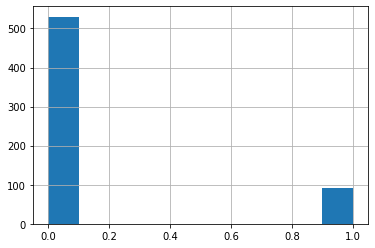

In [ ]:
raw_data['class'].hist()

In [ ]:
def train_validation_test_split(
    X, y, train_size=0.8, val_size=0.1, test_size=0.1, random_state=None, shuffle=True):
    assert int(train_size + val_size + test_size + 1e-7) == 1
    X_train_val, X_test, y_train_val, y_test = train_test_split(
        X, y, test_size=test_size, random_state=random_state, shuffle=shuffle)
    X_train, X_val, y_train, y_val = train_test_split(
        X_train_val, y_train_val,    test_size=val_size/(train_size+val_size), 
        random_state=random_state, shuffle=shuffle)
    return X_train, X_val, X_test, y_train, y_val, y_test

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f0405f60450>,
      dtype=object)

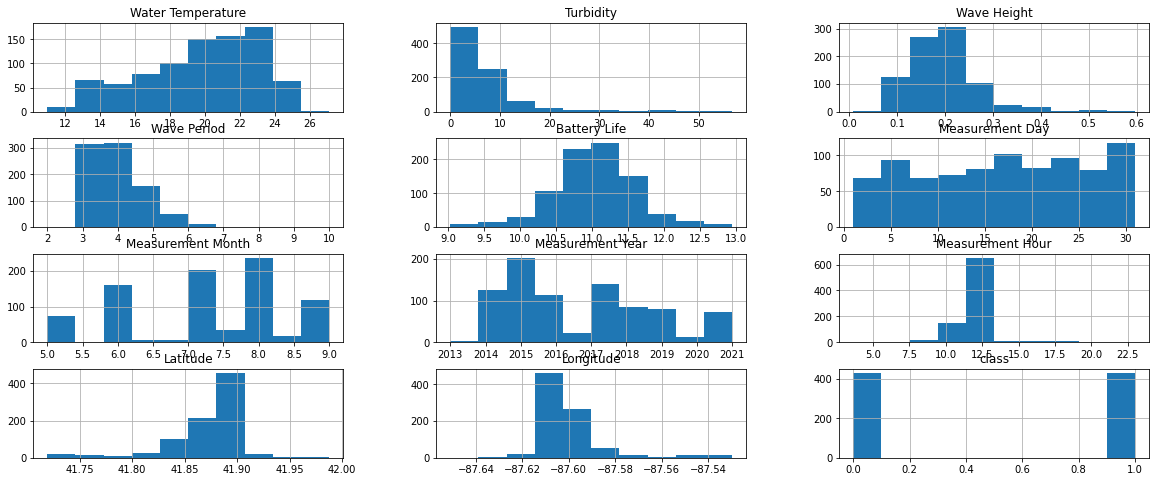

In [ ]:
X_resampled.hist()


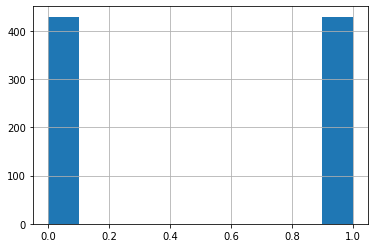

In [ ]:
from sklearn.model_selection import KFold, cross_val_score, train_test_split

df = grouped_Water
target = 'class'

X = df.drop(target,axis=1)

# X.pop('Measurement Date')
# X.pop('class')

y = df[target]

X_train, X_val, X_test, y_train, y_val, y_test = train_validation_test_split(X, y, train_size=0.7, val_size=0.2, test_size=0.1, random_state=42)

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# x_tr, x_test, y_val, y_test = train_test_split(X_train, y_train, test_size=0.50, random_state=8)

# from imblearn.over_sampling import SMOTE
sm = SMOTE(k_neighbors = 8)
X_resampled, y_resampled = sm.fit_resample(X_train, y_train)

X_resampled['class'] = y_resampled
X_resampled.head()

y_resampled.hist()

X_resampled.to_csv("WB.csv")




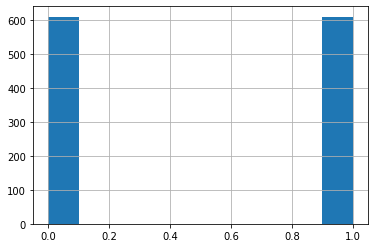

In [ ]:
from sklearn.model_selection import KFold, cross_val_score, train_test_split

df = raw_data
target = 'class'
X = df.drop(target,axis=1)
#X.pop('Measurement Date')
#X.pop('class')
y = df[target]

#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# from imblearn.over_sampling import SMOTE
sm = SMOTE(k_neighbors = 8)
X_resampled, y_resampled = sm.fit_resample(X, y)

X_resampled['class'] = y_resampled
X_resampled.head()

y_resampled.hist()

X_resampled.to_csv("WWB.csv")


